In [2]:
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
import seaborn as sns

## MLE como base para la regresión logística

 Consideramos el problema de MLE: 

$$
\max \sum_i \log P(y_i \vert x_i; h)
$$

donde:

$y_i$: clase o categoría de cada elemento y $x_i$: son los atributos de cada elemento, donde además cada elemento del dataset satisface una distribución de Bernoulli: 

$$
P = \begin{cases}
p,
& \text{si $y=1$,}\\
1-p, & \text{si $y=0$.} 
\end{cases} 
$$

En este caso la verosimilitud está dada por: 

$$
L = \hat{y}y+(1-\hat{y})(1-y)  
$$

Esta función da como resultado probabilidades altas cuando $\hat{y} \sim y$.

In [30]:
def likelihood(y,yp):
    return yp*y+(1-yp)*(1-y)

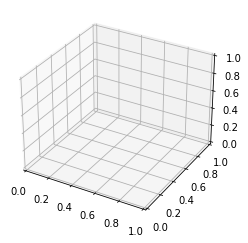

In [26]:
fig=plt.figure()
ax=fig.gca(projection="3d")



In [17]:
Y=np.arange(0,1,0.01)
Y

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

In [18]:
YP=np.arange(0,1,0.01)
YP

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

In [19]:
Y,YP=np.meshgrid(Y,YP)

In [35]:
Y

array([[0.  , 0.01, 0.02, ..., 0.97, 0.98, 0.99],
       [0.  , 0.01, 0.02, ..., 0.97, 0.98, 0.99],
       [0.  , 0.01, 0.02, ..., 0.97, 0.98, 0.99],
       ...,
       [0.  , 0.01, 0.02, ..., 0.97, 0.98, 0.99],
       [0.  , 0.01, 0.02, ..., 0.97, 0.98, 0.99],
       [0.  , 0.01, 0.02, ..., 0.97, 0.98, 0.99]])

In [36]:
YP

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       [0.02, 0.02, 0.02, ..., 0.02, 0.02, 0.02],
       ...,
       [0.97, 0.97, 0.97, ..., 0.97, 0.97, 0.97],
       [0.98, 0.98, 0.98, ..., 0.98, 0.98, 0.98],
       [0.99, 0.99, 0.99, ..., 0.99, 0.99, 0.99]])

In [37]:
Z=likelihood(Y,YP)
Z


array([[1.    , 0.99  , 0.98  , ..., 0.03  , 0.02  , 0.01  ],
       [0.99  , 0.9802, 0.9704, ..., 0.0394, 0.0296, 0.0198],
       [0.98  , 0.9704, 0.9608, ..., 0.0488, 0.0392, 0.0296],
       ...,
       [0.03  , 0.0394, 0.0488, ..., 0.9418, 0.9512, 0.9606],
       [0.02  , 0.0296, 0.0392, ..., 0.9512, 0.9608, 0.9704],
       [0.01  , 0.0198, 0.0296, ..., 0.9606, 0.9704, 0.9802]])

In [23]:
surf=ax.plot_surface(Y,YP,Z,cmap=cm.coolwarm)


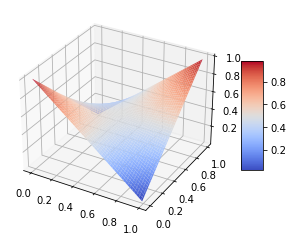

In [31]:
fig=plt.figure()
ax=fig.gca(projection="3d")
Y=np.arange(0,1,0.01)
YP=np.arange(0,1,0.01)
Y,YP=np.meshgrid(Y,YP)
Z=likelihood(Y,YP)
surf=ax.plot_surface(Y,YP,Z,cmap=cm.coolwarm)
fig.colorbar(surf,shrink=0.5,aspect=5)
plt.show()